Chapter 17

# 差分
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码的目的是利用数值差分法来近似求解函数

$$
f(x) = e^{-x^2}
$$

的导数，并将这些数值解与解析解进行对比，从而评估不同差分方法的准确性和步长对误差的影响。具体而言，代码定义了三种数值差分方法：

1. **中心差分法**：给出二阶精度近似导数的计算公式
   $$
   f'(a) \approx \frac{f(a + \Delta x) - f(a - \Delta x)}{2 \Delta x}
   $$

2. **前向差分法**：使用一阶前向差分，计算公式为
   $$
   f'(a) \approx \frac{f(a + \Delta x) - f(a)}{\Delta x}
   $$

3. **后向差分法**：使用一阶后向差分，计算公式为
   $$
   f'(a) \approx \frac{f(a) - f(a - \Delta x)}{\Delta x}
   $$

代码首先计算了导数的解析解，并在指定的一组点上应用这三种数值方法，以观察数值结果与解析结果的吻合情况。然后，代码在不同步长 $\Delta x$ 下，进一步探讨了这些方法对导数的估计精度。通常，随着 $\Delta x$ 的减小，中心差分法的数值导数会更接近解析导数，而过小的步长可能会因计算精度问题而导致数值误差的增加。

这段代码的核心目的是说明：数值差分法是近似求解导数的一种有效方法，尤其是在解析求导困难或不可行的情况下，但数值结果依赖于差分方法和步长的选取。中心差分法由于使用了两侧点的信息，通常能提供更高的精度。

## 导入包

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.abc import x
from sympy import latex, lambdify, diff, sin, log, exp  # 导入必要的符号计算函数

## 定义数值求导函数

In [2]:
def num_diff(f, a, method, dx):  # 数值求导函数
    if method == 'central':  # 中心差分法
        return (f(a + dx) - f(a - dx)) / (2 * dx)
    elif method == 'forward':  # 前向差分法
        return (f(a + dx) - f(a)) / dx
    elif method == 'backward':  # 后向差分法
        return (f(a) - f(a - dx)) / dx
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")  # 错误处理

In [3]:
f_x = exp(-x**2)  # 定义函数 f(x) = exp(-x^2)
f_x

exp(-x**2)

In [4]:
x_array = np.linspace(-3, 3, 100)  # 定义 x 取值范围
a_array = np.linspace(-2.5, 2.5, 11)  # 定义 a 的取值范围

In [5]:
f_x_fcn = lambdify(x, f_x)  # 将符号函数转换为数值函数
f_x_array = f_x_fcn(x_array)  # 计算函数在 x_array 上的值

In [6]:
f_x_1_diff = diff(f_x, x)  # 计算 f(x) 的一阶导数
f_x_1_diff

-2*x*exp(-x**2)

In [7]:
f_x_1_diff_fcn = lambdify(x, f_x_1_diff)  # 将导数转换为数值函数
f_x_1_diff_array = f_x_1_diff_fcn(x_array)  # 计算导数在 x_array 上的值

## 可视化函数和导数

(-3.0, 3.0)

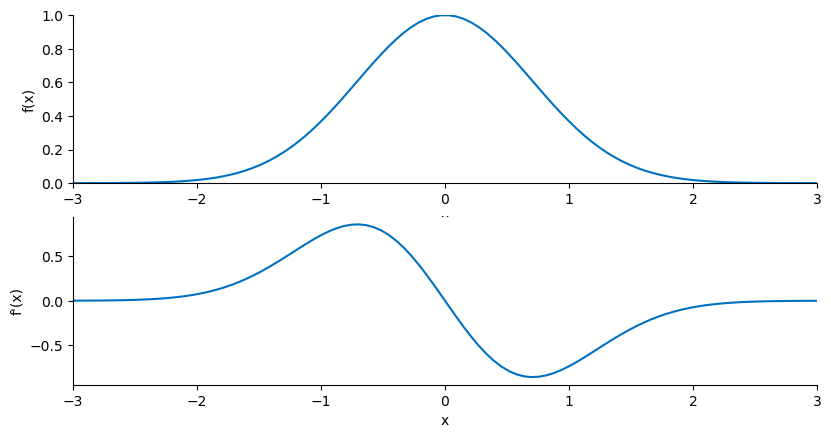

In [8]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(2, 1, 1)

ax.plot(x_array, f_x_array, '#0070C0', linewidth=1.5)  # 绘制函数 f(x)
ax.set_ylim(np.floor(f_x_array.min()),
            np.ceil(f_x_array.max()))  # 设置 y 轴范围

ax.set_xlabel('x')  # 设置 x 轴标签
ax.set_ylabel('f(x)')  # 设置 y 轴标签
ax.set_xlim((x_array.min(), x_array.max()))  # 设置 x 轴范围
ax.spines['right'].set_visible(False)  # 隐藏右边框
ax.spines['top'].set_visible(False)  # 隐藏上边框

ax = fig.add_subplot(2, 1, 2)

ax.plot(x_array, f_x_1_diff_array, '#0070C0', linewidth=1.5)  # 绘制导数 f'(x)

ax.set_xlabel('x')  # 设置 x 轴标签
ax.set_ylabel('f\'(x)')  # 设置 y 轴标签
ax.spines['right'].set_visible(False)  # 隐藏右边框
ax.spines['top'].set_visible(False)  # 隐藏上边框
ax.set_xlim((x_array.min(), x_array.max()))  # 设置 x 轴范围

## 数值求导方法比较

In [9]:
dx = 0.2  # 步长

diff_central = num_diff(f_x_fcn, a_array, 'central', dx)  # 中心差分法计算数值导数
diff_forward = num_diff(f_x_fcn, a_array, 'forward', dx)  # 前向差分法计算数值导数
diff_backward = num_diff(f_x_fcn, a_array, 'backward', dx)  # 后向差分法计算数值导数

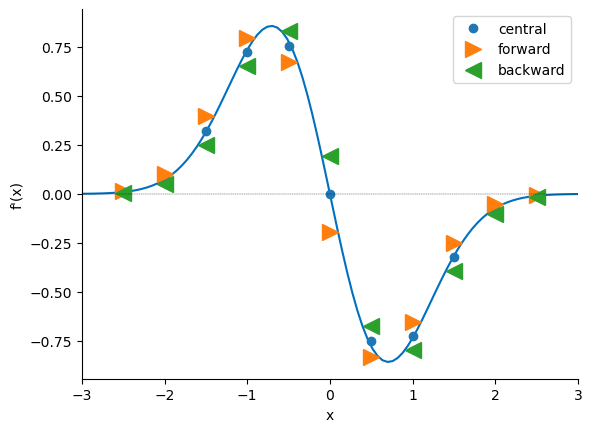

In [10]:
fig, ax = plt.subplots()

ax.plot(x_array, f_x_1_diff_array, '#0070C0', linewidth=1.5)  # 绘制解析导数

ax.plot(a_array, diff_central, marker='.', 
        markersize=12, linestyle='none',
        label='central')  # 绘制中心差分结果

ax.plot(a_array, diff_forward, marker='>', 
        markersize=12, linestyle='none',
        label='forward')  # 绘制前向差分结果

ax.plot(a_array, diff_backward, marker='<', 
        markersize=12, linestyle='none',
        label='backward')  # 绘制后向差分结果

ax.set_xlabel('x')  # 设置 x 轴标签
ax.set_ylabel('f\'(x)')  # 设置 y 轴标签
ax.spines['right'].set_visible(False)  # 隐藏右边框
ax.spines['top'].set_visible(False)  # 隐藏上边框
ax.set_xlim((x_array.min(), x_array.max()))  # 设置 x 轴范围
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.25)  # 添加 y=0 的参考线
plt.legend()  # 添加图例

## 不同步长下的数值导数

In [11]:
dx_array = np.linspace(0.01, 0.2, 20)  # 定义步长范围

In [12]:
a = 1  # 求导点

In [13]:
diff_central = num_diff(f_x_fcn, a, 'central', dx_array)  # 中心差分法在不同步长下的导数
diff_forward = num_diff(f_x_fcn, a, 'forward', dx_array)  # 前向差分法在不同步长下的导数
diff_backward = num_diff(f_x_fcn, a, 'backward', dx_array)  # 后向差分法在不同步长下的导数

In [14]:
f_x_1_diff_a = f_x_1_diff_fcn(a)  # 解析导数在 a 处的值

Text(0, 0.5, "f'(x)")

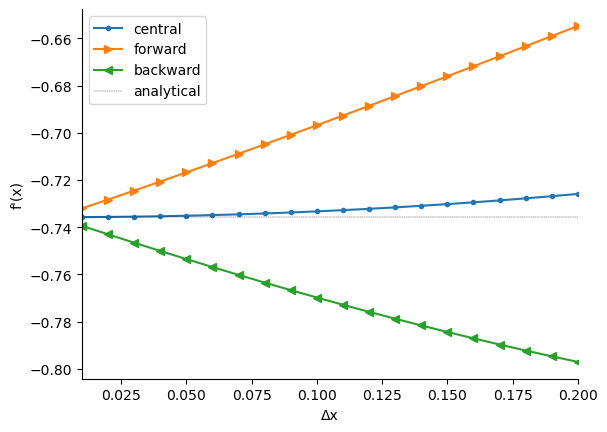

In [15]:
fig, ax = plt.subplots()

ax.plot(dx_array, diff_central, linewidth=1.5, 
        marker='.', label='central')  # 绘制中心差分结果
 
ax.plot(dx_array, diff_forward, linewidth=1.5, 
        marker='>', label='forward')  # 绘制前向差分结果
 
ax.plot(dx_array, diff_backward, linewidth=1.5, 
        marker='<', label='backward')  # 绘制后向差分结果

plt.axhline(y=f_x_1_diff_a, color='k', linestyle='--', 
            linewidth=0.25, label='analytical')  # 绘制解析解参考线

ax.set_xlim((dx_array.min(), dx_array.max()))  # 设置 x 轴范围
ax.spines['right'].set_visible(False)  # 隐藏右边框
ax.spines['top'].set_visible(False)  # 隐藏上边框
plt.legend()  # 添加图例
ax.set_xlabel('\u0394x')  # 设置 x 轴标签
ax.set_ylabel('f\'(x)')  # 设置 y 轴标签